# Análisis descriptivo de la pobreza multidimensional 2020

Utilizando la información del Consejo Nacional de Evaluación de la Política de Desarrollo Social (CONEVAL), realizaremos un análisis descriptivo con los siguientes elementos:
- Sexo  -  sexo
- Grupos de edad  -  edad
- Etnicidad  -  etnia
- Educación  -  niv_ed
- Estado Civil  -  edo_conyug
- Número de hijos  -  hijos_sob
- Jóvenes y adultos mayores
- Ingresos  -  ict
- Transferencias de programas sociales
- Remesas  -  remesas
- Migración  
- Ocupación  -  sinco
- Experiencia  
- Ahorro  -  deposito
- Tipo de trabajo: temporal o permanente  -  tipocontr
- Gastos en alimentación u otros rubros
- Deudas   -  deudas
- Formalidad vs informalidad  -  seguro
- Tamaño de empresa en la que trabaja  -  tam_emp
- Discapacidad  -  discap

In [2]:
#Data wrangling
import pandas as pd
import numpy as np
import random

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Jupyter notebook implementation
%matplotlib inline 

In [55]:
pobreza_df = pd.read_csv('pobreza_20.csv')
pobreza_df.head()

,folioviv,foliohog,numren,est_dis,upm,factor,tam_loc,rururb,ent,ubica_geo,...,ict,ing_mon,ing_lab,ing_ren,ing_tra,nomon,pago_esp,reg_esp,hli,discap
0,100013605,1,1,2,1,190,1,0,1,1001,...,5338.478315,5338.478315,4502.050071,0.0,836.428244,0.000000,0.0,0.000000,0.0,0.0
1,100013605,1,2,2,1,190,1,0,1,1001,...,5338.478315,5338.478315,4502.050071,0.0,836.428244,0.000000,0.0,0.000000,0.0,0.0
2,100013605,1,3,2,1,190,1,0,1,1001,...,5338.478315,5338.478315,4502.050071,0.0,836.428244,0.000000,0.0,0.000000,0.0,0.0
3,100013606,1,1,2,1,190,1,0,1,1001,...,8126.299401,8093.723435,7558.290403,0.0,535.433032,32.575966,0.0,32.575966,0.0,0.0
4,100013606,1,2,2,1,190,1,0,1,1001,...,8126.299401,8093.723435,7558.290403,0.0,535.433032,32.575966,0.0,32.575966,0.0,0.0


In [4]:
#Lista de todas las variables    
columns = 4
for first, second, third, fourth in zip(
    pobreza_df.columns[::columns], pobreza_df.columns[1::columns], pobreza_df.columns[2::columns], pobreza_df.columns[3::columns]
):
    print(f'{first: <10}    {second: <10}    {third: <10}    {fourth}')


folioviv      foliohog      numren        est_dis
upm           factor        tam_loc       rururb
ent           ubica_geo     edad          sexo
parentesco    etnia         edo_conyug    hijos_sob
remesas       sinco         deposito      tipocontr
deudas        seguro        tam_emp       ic_rezedu
anac_e        inas_esc      niv_ed        ic_asalud
ic_segsoc     sa_dir        ss_dir        s_salud
par           jef_ss        cony_ss       hijo_ss
pea           jub           pam           ing_pam
ic_cv         icv_pisos     icv_muros     icv_techos
icv_hac       ic_sbv        isb_agua      isb_dren
isb_luz       isb_combus    ic_ali_nc     id_men
tot_iaad      tot_iamen     ins_ali       ic_ali
lca           dch           plp_e         plp
pobreza       pobreza_e     pobreza_m     vul_car
vul_ing       no_pobv       i_privacion    carencias
carencias3    cuadrantes    prof1         prof_e1
profun        int_pob       int_pobe      int_vulcar
int_caren     tamhogesc     ictpc         

## Pobreza en México

### Relación entre educación y pobreza por edad

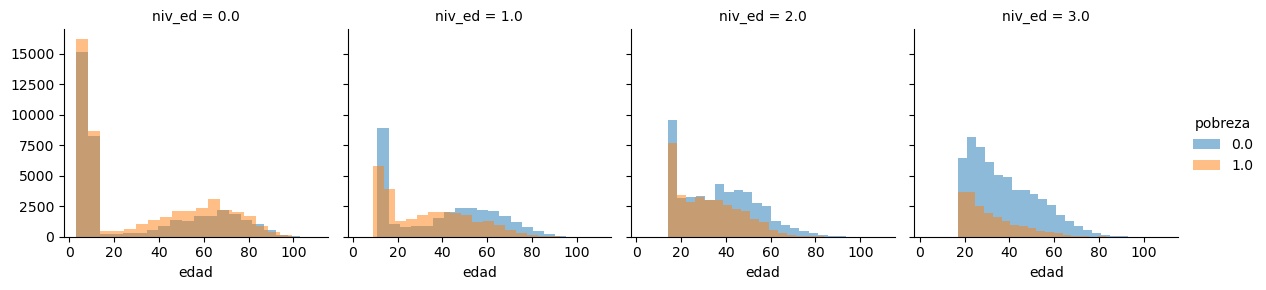

In [12]:
grid = sns.FacetGrid(pobreza_df, col = 'niv_ed', hue = 'pobreza')

grid.map(plt.hist, 'edad', alpha = .5, bins = 20)
grid.add_legend()

### Relación entre formalidad y pobreza por edad

Una persona se dice que tiene un trabajo formal cuando tiene seguro médico (privado o no) proveído por su trabajo.

In [8]:
pobreza_df[['seguro', 'pobreza']].groupby(['seguro'], as_index = False).mean()

,seguro,pobreza
0,0.0,0.480393
1,1.0,0.115569


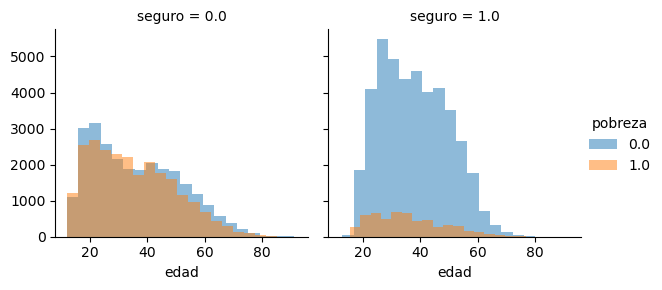

In [15]:
grid = sns.FacetGrid(pobreza_df, col = 'seguro', hue = 'pobreza')
grid.map(plt.hist, 'edad', alpha = 0.5, bins = 20)
grid.add_legend()

Se puede concluir que existe una relación significativa entre el tipo de empleo y la pobreza. El 48% de las personas con trabajo informal son pobres mientras que solamente el 11.55% de las personas con trabajo formal son pobres.

Es posible que esta diferencia se deba a diversas razones. En la mayoría de los casos, los trabajos informales pueden no ofrecer salarios estables o prestaciones laborales, lo que hace que las personas con trabajos informales tengan mayor dificultad para cubrir sus necesidades básicas.

También es posible que los trabajos informales no requieran una educación formal o capacitación especializada, lo que limita las oportunidades de progreso y crecimiento laboral, por lo que limita las oportunidades de aumentar los ingresos.

### Etnicidad y pobreza por edad

In [14]:
pobreza_df[['etnia', 'pobreza']].groupby(['etnia'], as_index = False).mean()

,etnia,pobreza
0,1.0,0.535840
1,2.0,0.364738


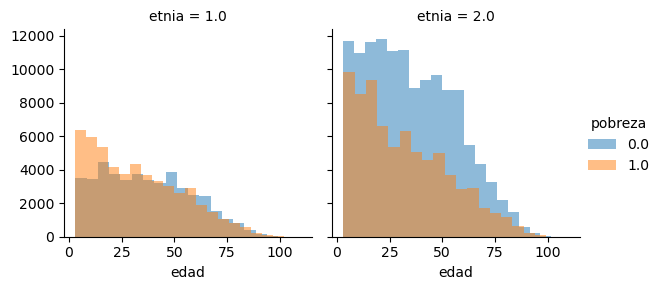

In [11]:
grid = sns.FacetGrid(pobreza_df, col = 'etnia', hue = 'pobreza')
grid.map(plt.hist, 'edad', alpha = 0.5, bins = 20)
grid.add_legend()

Siguiendo el descriptor de bases de la ENIGH, cuando etnia toma el valor de 2 quiere decir que la persona **no** se considera indígena.

### Situación conyugal y pobreza

In [13]:
pobreza_df[['edo_conyug', 'pobreza']].groupby(['edo_conyug'], as_index = False).mean()
# 1. Vive con su pareja o unión libre
# 2. Está casado(a)
# 3. Está separado(a)
# 4. Está divorciado(a)
# 5. Es viudo(a)
# 6. Está soltero(a)

,edo_conyug,pobreza
0,1.0,0.477919
1,2.0,0.367542
2,3.0,0.407070
3,4.0,0.237537
4,5.0,0.382192
5,6.0,0.408685


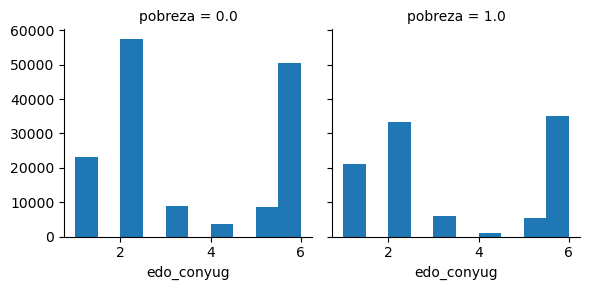

In [20]:
grid = sns.FacetGrid(pobreza_df, col = 'pobreza')
grid.map(plt.hist, 'edo_conyug')

La situación conyugal pudiera no ser un determinante relevante de la pobreza ya que las personas de todos los estados civiles tienen una tasa de pobreza significativa. 

Existe una diferencia significativa entre las personas que viven con su pareja (unión libre) y las personas casadas, una teoría obvia es que las personas sin dinero es menos probable que se casen por lo que permanecen en unión libre. 

Las personas que viven con su pareja tienen la tasa más alta de pobreza, seguidas por los separados y los solteros. Mientras que las personas divorciadas y casadas tienen tasas de pobreza relativamente más bajas. Siendo las personas divorciadas las _menos pobres_. Esto puede explicarse con que un divorcio es costoso por los que aquellos con más dinero estarían dispuestos a pagarlo mientras que los demás simplemente se separan.

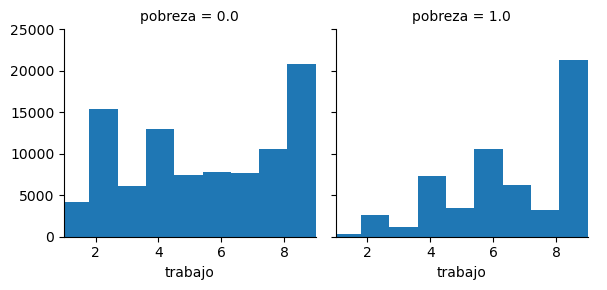

In [63]:
pobreza_df["sinco"] = pobreza_df['sinco'].fillna(0)
pobreza_df["trabajo"] = pobreza_df.sinco.astype(str).str[:1]
pobreza_df["trabajo"] = pobreza_df["trabajo"].astype(float)

grid = sns.FacetGrid(pobreza_df, col = 'pobreza')
grid.set(xlim = (1,9))
grid.set(ylim = (0, 25000))
grid.map(plt.hist, 'trabajo')
grid.add_legend()

In [62]:
pobreza_df[['trabajo', 'pobreza']].groupby(['trabajo'], as_index = False).mean().sort_values(by = 'pobreza', ascending = True)

# 1. Funcionarios, directores y jefes
# 2. Profesionistas y técnicos
# 3. Trabajadores auxiliaries en actividades administrativas
# 4. Comerciantes, empleados en ventas y agentes de ventas
# 5. Trabajadores en servicios personales y de vigilancia
# 6. Trabajadores en actividades agrícolas, ganaderas, forestales, caza y pesca
# 7. Trabajadores artesanales, en las construcción u otros oficios
# 8. Operadores de maquinaria industrial, ensambladores, choferes y conductores de transporte
# 9. Trabajadores en actividades elemenatles y de apoyo

,trabajo,pobreza
1,1.0,0.076080
2,2.0,0.143903
3,3.0,0.156028
8,8.0,0.235481
5,5.0,0.320686
4,4.0,0.358844
7,7.0,0.446248
0,0.0,0.464451
9,9.0,0.504758
6,6.0,0.574947


A partir de los datos proporcionados, se puede concluir que hay una fuerte relación entre el tipo de trabajo y la pobreza en México. En general, las personas que trabajan en ocupaciones que requieren habilidades y educación más avanzadas, como los funcionarios, directores y jefes, y los profesionales y técnicos, tienen tasas de pobreza significativamente más bajas en comparación con los trabajadores en ocupaciones que no requieren tanta educación o habilidades especializadas.

Los trabajos donde hay menos pobres, intuitivamente, son:
- Funcionarios, directores y jefes.
- Profesionistas y técnicos

Mientras que los trabajos con más población en pobreza son:

- Trabajadores en actividades agrícolas, ganaderas, forestales, caza y pesca
- Trabajadores en actividades elementales y de apoyo

Este último, según la INEGI, clasifican los trabajadores que auxilian los procesos productivos, realizando actividades sencillas
y rutinarias que implican básicamente esfuerzo físico, destreza motriz y conocimientos básicos que se aprenden en la práctica en sólo unas jornadas de trabajo.

Estos datos sugieren que la educación y las habilidades son factores importantes que influyen en las oportunidades laborales y la reducción de la pobreza en México. Además, indican la necesidad de políticas y programas que apoyen la formación y capacitación de habilidades para mejorar el acceso a trabajos mejor remunerados y reducir la pobreza en el país.